In [1]:
#6th february 2023

In [2]:
#major project 1
#housing price predection in india's city

In [3]:
#import required library
#import dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('/content/housing data.csv')
df.head()

,location,area,price,price_currency,status,new/resale,price_negotiable,description,security_deposit,facing,...,Staff Quarter,Multipurpose Room,Car Parking,Hospital,School,Shopping Mall,Vaastu Compliant,Cafeteria,Rain Water Harvesting,Golf Course
0,Dhakoli,1300,2850000,INR,NaN,0,0,This spacious 2 bhk builder floor is available...,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dhakoli,1400,3600000,INR,NaN,0,0,It’s a 3 bhk builder floor situated in Dhakoli...,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dhakoli,1350,3690000,INR,NaN,0,0,It has an area of 1350 sqft with a carpet area...,1,northeast,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,New chandigarh mohali,1200,10000000,INR,NaN,0,0,It has a salable area of 1200 sqft and is avai...,1,northeast,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sunny Enclave,1008,3090000,INR,NaN,1,0,This spacious 2 bhk builder floor is available...,1,east,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['description'],df['new/resale']=df['new/resale'],df['description']
df.rename(columns={'new/resale':'description','description':'new/resale'},inplace = True)


In [5]:
#understanding a data

In [6]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.info()  #information about a data

In [8]:
df.shape #columns = 39 , row = 1056 

(1056, 39)

In [9]:
df.size  #total element 41184

41184

In [ ]:
df.nunique()


In [11]:
#data cleaning
df.drop(df.iloc[:,23:31],axis = 1,inplace = True)
#df.drop(df.iloc[:,21:28],axis = 1,inplace = True)
df.drop(['price_currency','security_deposit','status'],axis = 1, inplace = True)

In [12]:
df.drop(df.iloc[:,21:28],axis = 1,inplace = True)

In [13]:
df.head()

,location,area,price,description,price_negotiable,new/resale,facing,furnished,age of property,Lift(s),...,24 X 7 Security,Children's play area,Club House,Gymnasium,Swimming Pool,Sports Facility,Jogging Track,Landscaped Gardens,locality_score,Car Parking
0,Dhakoli,1300,2850000,This spacious 2 bhk builder floor is available...,0,0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,Dhakoli,1400,3600000,It’s a 3 bhk builder floor situated in Dhakoli...,0,0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,Dhakoli,1350,3690000,It has an area of 1350 sqft with a carpet area...,0,0,northeast,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,New chandigarh mohali,1200,10000000,It has a salable area of 1200 sqft and is avai...,0,0,northeast,1,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,Sunny Enclave,1008,3090000,This spacious 2 bhk builder floor is available...,0,1,east,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [14]:
#COLLECT DESCRIPIVE STATISTICS
df.describe()

,area,price,price_negotiable,new/resale,furnished,age of property,Lift(s),Full Power Backup,24 X 7 Security,Children's play area,Club House,Gymnasium,Swimming Pool,Sports Facility,Jogging Track,Landscaped Gardens,locality_score,Car Parking
count,1056.000000,1.056000e+03,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,39.000000,624.0
mean,1320.814394,4.952882e+06,0.692235,0.889205,0.201705,3.760417,0.332386,0.523674,0.574811,0.444129,0.317235,0.404356,0.291667,0.307765,0.344697,0.226326,7.138462,1.0
std,621.300997,5.834945e+06,0.461788,0.314027,0.401463,18.838812,0.471292,0.499676,0.494606,0.497104,0.465620,0.491000,0.454745,0.461788,0.475495,0.418651,0.240192,0.0
min,460.000000,1.290000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.100000,1.0
25%,930.000000,2.580000e+06,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.100000,1.0
50%,1200.000000,3.590000e+06,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.100000,1.0
75%,1620.000000,6.000000e+06,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,7.100000,1.0
max,9000.000000,1.000000e+08,1.000000,1.000000,1.000000,122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.600000,1.0


In [15]:
df.nunique()

location                 96
area                    204
price                   327
description             884
price_negotiable          2
new/resale                2
facing                    8
furnished                 2
age of property          12
Lift(s)                   2
Full Power Backup         2
24 X 7 Security           2
Children's play area      2
Club House                2
Gymnasium                 2
Swimming Pool             2
Sports Facility           2
Jogging Track             2
Landscaped Gardens        2
locality_score            2
Car Parking               1
dtype: int64

In [16]:
#FIND THE MEAN OR MAX OF AREA OF HOUSING

Housing_Area_Mean = df['area'].mean()
print('Housing area mean value:',Housing_Area_Mean)

print('\n')

Housing_Area_Max = df['area'].max()
print('Housing area max value:',Housing_Area_Max)


print('\n')

#FIND THE MEAN OR PRICE OF HOUSING

Housing_Price_Mean = df['price'].mean()
print('Housing price mean value:',Housing_Price_Mean)

print('\n')

Housing_Price_Max = df['price'].max()
print('Housing price max value:',Housing_Price_Max)


Housing area mean value: 1320.814393939394


Housing area max value: 9000


Housing price mean value: 4952881.860795454


Housing price max value: 100000000


In [17]:
#EDA - explerotery data analysis
#analysis of area and price of housing


<AxesSubplot:xlabel='count', ylabel='age of property'>

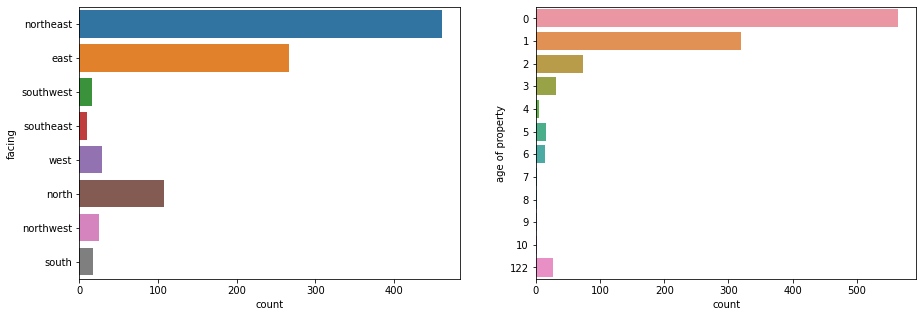

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(y='facing', data = df)
plt.subplot(1,2,2)
sns.countplot(y='age of property',data = df)

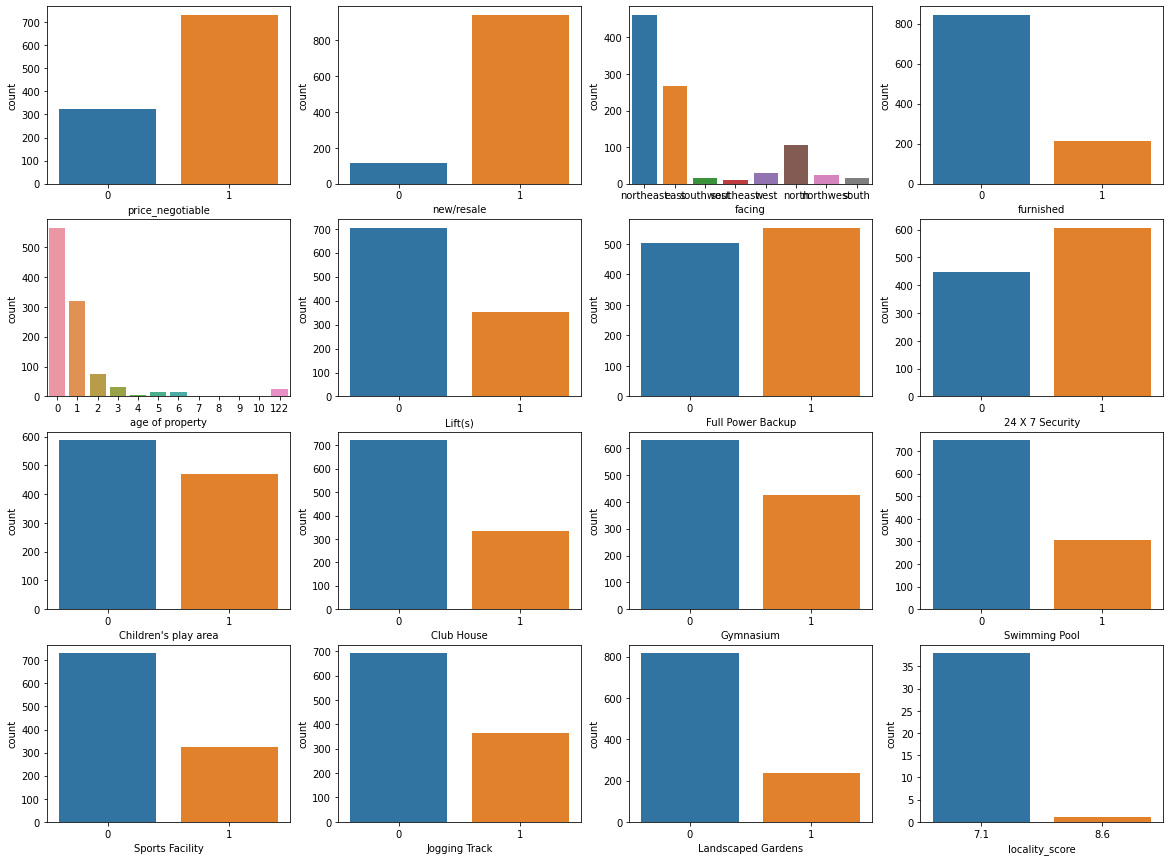

In [19]:
plt.figure(figsize=(20,15))
for i in range(4,len(df.columns)-1):
  plt.subplot(4,4,i-3)
  sns.countplot(x=df.columns[i],data = df)

In [20]:
#LOGISTIC REGRESSION - CLASSIFICATION TECHNIQUE(SUPERVISED LEARNING)

In [21]:
#divide the data into i/p and o/p

In [22]:
#df['price'],df['location']=df['location'],df['price']
#df.rename(columns={'location':'price','price':'location'},inplace = True)

In [23]:
#df['description'],df['area']=df['area'],df['description']
#df.rename(columns={'area':'description','description':'area'},inplace = True)


In [24]:
#df['facing'],df['area']=df['area'],df['facing']
#df.rename(columns={'area':'facing','facing':'area'},inplace = True)


In [ ]:
x = df.iloc[:,1:2].values


In [26]:
y = df.iloc[:,2].values


array([2850000, 3600000, 3690000, ..., 5800000, 4900000, 2590000])

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [30]:
model.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred = model.predict(x_test)

In [ ]:
y_test